In [1]:
from sklearn.datasets import  fetch_mldata

mnist = fetch_mldata('MNIST original',data_home=r'E:\python_work\handson_ml\datasets')

In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X,y = mnist.data,mnist.target

In [4]:
X.shape

(70000, 784)

In [5]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
y.shape

(70000,)

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt


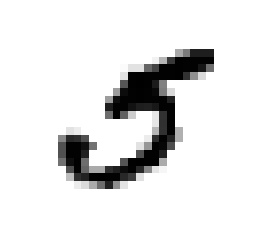

In [6]:
%matplotlib inline
import matplotlib
some_digits = X[36000]
some_digits_image = some_digits.reshape(28,28)

plt.imshow(some_digits_image,cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [7]:
y[36000]

5.0

In [8]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]


In [9]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]


In [10]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)


E:\anaconda\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [30]:
sgd_clf.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'n_iter': 5,
 'n_jobs': 1,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'verbose': 0,
 'warm_start': False}

In [12]:
sgd_clf.predict([some_digits])

array([False], dtype=bool)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfolds = StratifiedKFold(n_splits=5,random_state=42)
cross_val_score(sgd_clf,X_train,y_train,cv=skfolds,scoring='accuracy')


array([ 0.854394  ,  0.87935344,  0.88258333,  0.82303909,  0.87170724])

In [35]:
from sklearn.base import  BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    

In [38]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=skfolds,scoring='accuracy')

array([ 0.90959087,  0.90966667,  0.90966667,  0.90966667,  0.90965914])

In [14]:
from sklearn.model_selection import  cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=skfolds)

In [15]:
y_train_pred

array([False, False, False, ..., False, False,  True], dtype=bool)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53826,   753],
       [ 1463,  3958]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.84016132455954151

In [18]:
recall_score(y_train_5,y_train_pred)

0.73012359343294597

In [19]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.78128701144887491

In [20]:
y_scores = sgd_clf.decision_function([some_digits])
y_scores

array([-65559.46348905])

In [21]:
threshold=0
y_some_digit_pred = (y_scores>threshold)

In [22]:
y_some_digit_pred

array([False], dtype=bool)

In [23]:
threshold=200000
y_some_digit_pred = (y_scores>threshold)

In [24]:
y_some_digit_pred

array([False], dtype=bool)

In [25]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=skfolds,method='decision_function')

In [27]:
y_scores
#len(y_scores)


array([[       0.        ,  -880118.53190913],
       [       0.        ,  -639390.75445411],
       [       0.        , -1148767.58541253],
       ..., 
       [       0.        ,  -541674.01834271],
       [       0.        ,  -403245.69350163],
       [       0.        ,   136011.7047158 ]])

In [29]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,threshold = precision_recall_curve(y_train_5,y_scores[:,1])

In [33]:
threshold.shape,precisions.shape,recalls.shape

((59801,), (59802,), (59802,))

In [34]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='precision')
    plt.plot(thresholds,recalls[:-1],'g--',label='recall')
    plt.xlabel('Thresholds')
    plt.legend(loc='best')
    plt.ylim([0,1])
    #plt.xlim([-1000000,1000000])

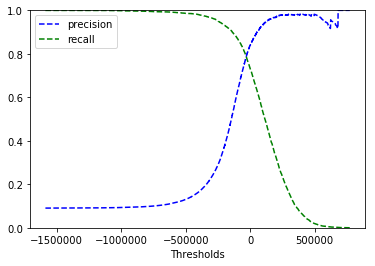

In [35]:
plot_precision_recall_vs_threshold(precisions,recalls,threshold)
plt.show()

In [38]:
y_train_pred = (y_scores>70000)[:,1]


In [39]:
precision_score(y_train_5,y_train_pred)

0.91409129571874115

In [40]:
recall_score(y_train_5,y_train_pred)

0.59472422062350117

In [65]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_train_5,y_scores)

In [41]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    

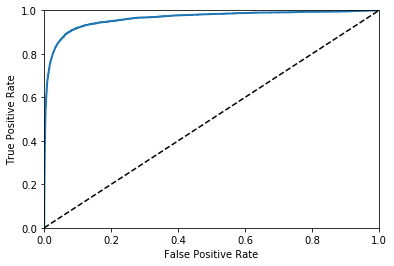

In [69]:
plot_roc_curve(fpr,tpr)
plt.show()

In [70]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.96318020950350491

In [71]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=skfolds,method='predict_proba')



In [72]:
y_probas_forest


array([[ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [73]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest,threshold_forest = roc_curve(y_train_5,y_scores_forest)


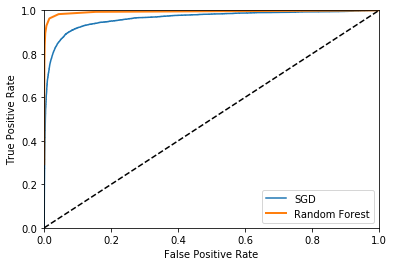

In [74]:
plt.plot(fpr,tpr,label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc='best')
plt.show()

In [75]:
roc_auc_score(y_train_5,y_scores_forest)

0.99361868761970062

In [78]:
threshold_forest

array([ 1. ,  0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.2,  0.1,  0. ])

In [100]:
precision_score(y_train_5,(y_scores_forest>0.45))

0.96613545816733071

In [101]:
recall_score(y_train_5,(y_scores_forest>0.45))


0.89466888028039104

In [84]:
plot_precision_recall_vs_threshold(tpr_forest.fpr_forest,threshold_forest)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'fpr_forest'

In [82]:
tpr_forest

array([ 0.29275042,  0.50968456,  0.65449179,  0.75908504,  0.83969747,
        0.89466888,  0.9295333 ,  0.9627375 ,  0.98266003,  0.99317469,  1.        ])

In [83]:
fpr_forest

array([  0.00000000e+00,   9.16103263e-05,   2.38186848e-04,
         5.86306088e-04,   1.48408729e-03,   3.11475109e-03,
         6.66923176e-03,   1.53905348e-02,   4.30934975e-02,
         1.54088569e-01,   1.00000000e+00])

In [85]:
precisions_forest,recall_forest,thresholds_forest = precision_recall_curve(y_train_5,y_scores_forest)

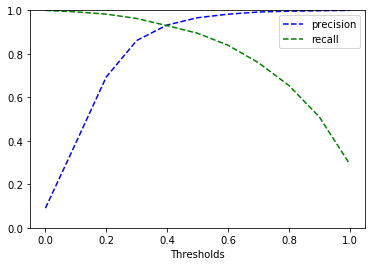

In [88]:
plot_precision_recall_vs_threshold(precisions_forest,recall_forest,thresholds_forest)
plt.show()

In [103]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digits])

array([ 5.])

In [104]:
some_digits_scores = sgd_clf.decision_function([some_digits])
some_digits_scores

array([[-239493.35035113, -501401.29241085, -286184.74361647,
        -312164.4099969 , -289257.22540192,  118152.63363289,
        -921105.58308675, -394380.91669271, -603494.09698121,
        -637390.58430312]])

In [105]:
np.argmax(some_digits_scores)

5

In [106]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [108]:
sgd_clf.classes_[5]

5.0

In [109]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digits])



array([ 5.])

In [110]:
len(ovo_clf.estimators_)

45

In [111]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digits])


array([ 5.])

In [112]:
forest_clf.predict_proba([some_digits])

array([[ 0.2,  0. ,  0. ,  0. ,  0. ,  0.7,  0. ,  0.1,  0. ,  0. ]])

In [113]:
cross_val_score(sgd_clf,X_train,y_train,cv=skfolds,scoring='accuracy')

array([ 0.85597668,  0.86518914,  0.86725   ,  0.8532133 ,  0.86412137])

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=skfolds,scoring='accuracy')


array([ 0.91120367,  0.91334778,  0.91033333,  0.90997749,  0.90646882])

In [119]:
cross_val_score(forest_clf,X_train_scaled,y_train,cv=skfolds,scoring='accuracy')

array([ 0.94252395,  0.94675887,  0.942     ,  0.94065183,  0.94139713])

In [120]:
y_train_pred= cross_val_predict(forest_clf,X_train_scaled,y_train,cv=skfolds)
conf_mx = confusion_matrix(y_train,y_train_pred)

In [121]:
conf_mx

array([[5821,    2,   13,    9,    4,   12,   30,    1,   26,    5],
       [   5, 6639,   37,   10,   10,    2,    5,   15,   13,    6],
       [  41,   34, 5645,   51,   40,   12,   29,   40,   57,    9],
       [  28,   20,  147, 5627,   11,  122,    5,   49,   85,   37],
       [  18,   13,   25,    8, 5567,    8,   31,   13,   18,  141],
       [  40,   20,   28,  211,   28, 4939,   53,   12,   57,   33],
       [  53,   12,   32,    4,   22,   59, 5715,    1,   20,    0],
       [  14,   27,   95,   21,   72,    4,    2, 5932,   15,   83],
       [  30,   52,  101,  127,   56,  111,   39,   12, 5256,   67],
       [  32,   12,   39,   89,  166,   49,    3,   85,   55, 5419]])

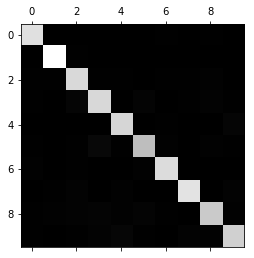

In [122]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [123]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx / row_sums

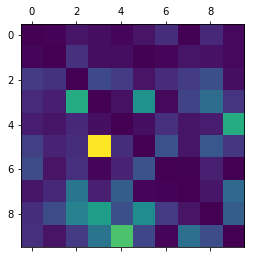

In [125]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [9]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>=7)
y_train_odd = (y_train %2 ==1)
y_multilabel = np.c_[y_train_large,y_train_odd]


In [10]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
knn_clf.predict([X_train[36000]])

array([[ True, False]], dtype=bool)

In [1]:

from sklearn.model_selection import cross_val_predict



In [13]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_train,cv=3)
from sklearn.metrics import f1_score
f1_score(y_train,y_train_knn_pred)

In [6]:
noise = np.random.randint(0,100,(len(X_train),784))
noise_test = np.random.randint(0,100,(len(X_test),784))

X_train_mod = X_train + noise
X_test_mod = X_test + noise_test

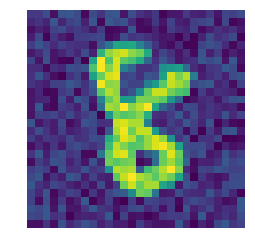

In [7]:
plt.imshow(X_train_mod[36000].reshape(28,28))
plt.axis('off')
plt.show()

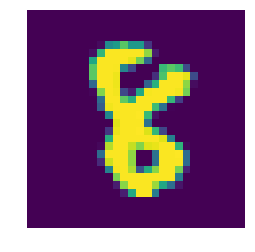

In [8]:
plt.imshow(X_train[36000].reshape(28,28))
plt.axis('off')
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

knn_clf_new = KNeighborsClassifier(weights='distance',n_neighbors=4)
knn_clf_new.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

In [14]:
y_knn_pred = knn_clf_new.predict(X_test)